In [1]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

In [2]:
(train_imgs,train_labels),(test_imgs,test_labels) = tf.keras.datasets.mnist.load_data(path="L:/Datasets/mnist.npz")

BufferSize = train_imgs.shape[0]
BatchSize = 128

train_imgs = train_imgs/127.5-1
train_imgs = tf.expand_dims(train_imgs,-1)
trainloader = tf.data.Dataset.from_tensor_slices((train_imgs,train_labels)).shuffle(BufferSize).batch(BatchSize)

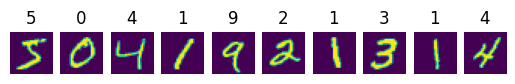

In [3]:
def showBatchImg(images,labels,maxNum=5):
    fig, axes = plt.subplots(1, maxNum)
    for i in range(maxNum):
        axes[i].imshow(images[i].numpy().squeeze())
        axes[i].set_title(labels[i].item())
        axes[i].axis('off')
    plt.show()

train_imgs.shape
showBatchImg(train_imgs, train_labels, 10)

## ACGAN Model

```
concatenate[noise,label] ==> Generator ==>  Fake_Img |                      | 0/1
                                                     |==> Discriminator ==> |
                                            Real_Img |                      | label
```

只是修改了一下cGAN的D，以及相关lossfn

感觉不太对劲。。模式崩溃？？？

In [4]:
noise_len = 50
label_num = 10

def Generator(): 
    seed = layers.Input(shape=(noise_len,))
    label = layers.Input(shape=(()))
    
    Embd = layers.Embedding(label_num,noise_len)(label)
    # Embd = layers.Reshape((noise_len,))(Embd)
    x = layers.concatenate([seed,Embd])                           ## B*100
    x = keras.Sequential(
    [
        # layers.LayerNormalization(),
        layers.Dense(3*3*128,use_bias = False),                      ##  B*? ==> B*-
        layers.Reshape((3,3,128)),                                   ##      ==> B*3*3*128
        layers.BatchNormalization(), 
        layers.ReLU(),
        layers.Conv2DTranspose(64, 3, 2, use_bias=False),            ##      ==> B*7*7*64      ##  filters, kernel_size, strides
        layers.BatchNormalization(),                                                            ## = *strides + max(0,kernel_size-strides)
        layers.ReLU(),
        layers.Conv2DTranspose(32, 3, 2, padding="same", use_bias=False), ## ==> B*14*14*32     
        layers.BatchNormalization(), 
        layers.ReLU(),
        layers.Conv2DTranspose(1, 3, 2, padding="same", use_bias=False),  ## ==> B*28*28*1
        layers.Activation('tanh')
    ])(x)
    GModel = tf.keras.Model(inputs=[seed,label],outputs=x)
    return GModel

def Discriminator():
    img = layers.Input(shape=(28,28,1))             ## B*28*28*1
    x = keras.Sequential(                     
    [
        layers.Conv2D(32, (3, 3),strides=(2, 2), padding="same", use_bias=False),    ##  ==> B*14*14*32
        layers.BatchNormalization(), 
        layers.LeakyReLU(),
        layers.Dropout(0.5), 
        layers.Conv2D(64, (3, 3),strides=(2, 2), padding="same", use_bias=False),    ##  ==> B*7*7*64
        layers.BatchNormalization(), 
        layers.LeakyReLU(),
        layers.Dropout(0.5),  
        layers.Conv2D(128, (3, 3),strides=(2, 2), padding="same", use_bias=False),  
        layers.BatchNormalization(), 
        layers.LeakyReLU(),
        layers.Dropout(0.5),  
        layers.Flatten(),                                                            ##  ==> B*3136
        
    ])(img)
    out1 = layers.Dense(1)(x)                                                        ## 0/1   logits: 未被 Activation 处理
    out2 = layers.Dense(label_num)(x)                                                ## label class
    DModel = tf.keras.Model(inputs=img,outputs=[out1,out2])
    return DModel


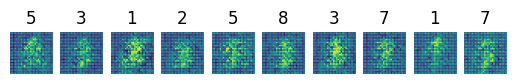

Epoch 1----Generator Loss:: 3.626267----Discriminator Loss:: 5.256888


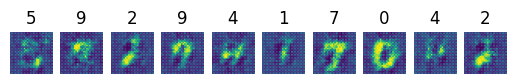

Epoch 2----Generator Loss:: 1.247056----Discriminator Loss:: 2.623882


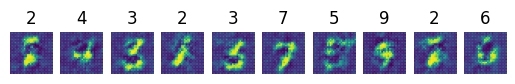

Epoch 3----Generator Loss:: 0.979252----Discriminator Loss:: 2.224692


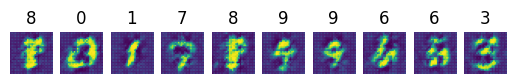

Epoch 4----Generator Loss:: 0.840438----Discriminator Loss:: 2.020469


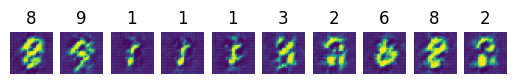

Epoch 5----Generator Loss:: 0.767581----Discriminator Loss:: 2.163550


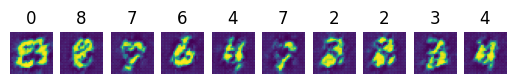

Epoch 6----Generator Loss:: 0.862796----Discriminator Loss:: 1.763726


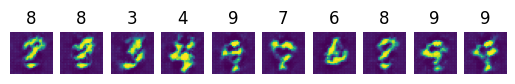

Epoch 7----Generator Loss:: 0.824525----Discriminator Loss:: 1.828601


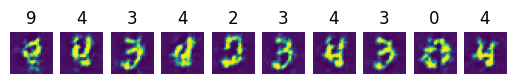

Epoch 8----Generator Loss:: 0.784353----Discriminator Loss:: 1.994455


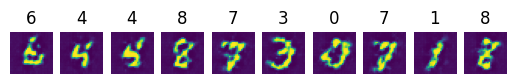

Epoch 9----Generator Loss:: 0.858670----Discriminator Loss:: 1.851188


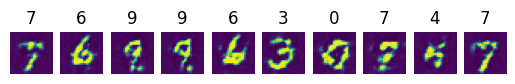

Epoch 10----Generator Loss:: 0.820327----Discriminator Loss:: 1.772938


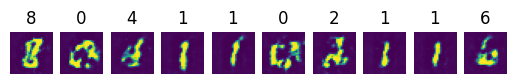

Epoch 11----Generator Loss:: 0.840522----Discriminator Loss:: 1.676306


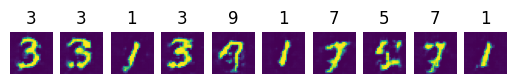

Epoch 12----Generator Loss:: 0.736060----Discriminator Loss:: 1.857024


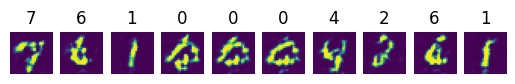

Epoch 13----Generator Loss:: 0.775913----Discriminator Loss:: 1.749537


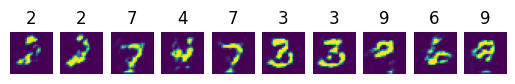

Epoch 14----Generator Loss:: 0.726736----Discriminator Loss:: 1.803692


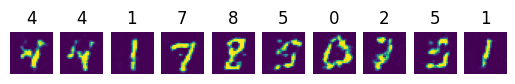

Epoch 15----Generator Loss:: 0.759429----Discriminator Loss:: 2.051266


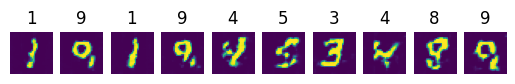

Epoch 16----Generator Loss:: 0.805174----Discriminator Loss:: 1.700842


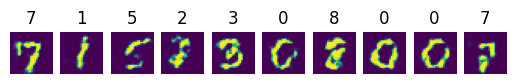

Epoch 17----Generator Loss:: 0.750685----Discriminator Loss:: 1.803287


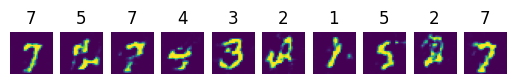

Epoch 18----Generator Loss:: 0.769487----Discriminator Loss:: 1.758589


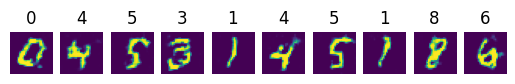

Epoch 19----Generator Loss:: 0.749642----Discriminator Loss:: 2.005472


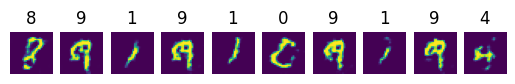

Epoch 20----Generator Loss:: 0.745874----Discriminator Loss:: 1.941363


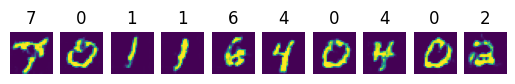

Epoch 21----Generator Loss:: 0.791134----Discriminator Loss:: 1.669111


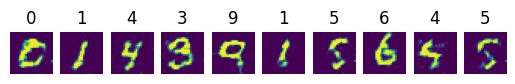

Epoch 22----Generator Loss:: 0.804604----Discriminator Loss:: 1.566396


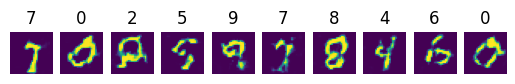

Epoch 23----Generator Loss:: 0.711032----Discriminator Loss:: 1.567388


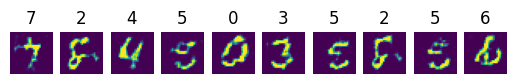

Epoch 24----Generator Loss:: 0.734248----Discriminator Loss:: 1.680944


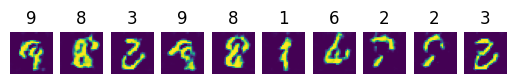

Epoch 25----Generator Loss:: 0.714389----Discriminator Loss:: 1.632377


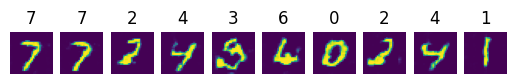

Epoch 26----Generator Loss:: 0.754125----Discriminator Loss:: 1.482862


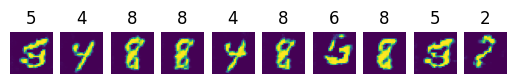

Epoch 27----Generator Loss:: 0.775498----Discriminator Loss:: 1.671734


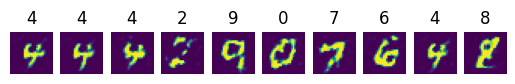

Epoch 28----Generator Loss:: 0.737104----Discriminator Loss:: 1.576147


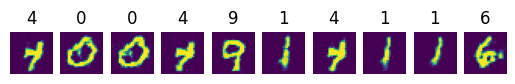

Epoch 29----Generator Loss:: 0.784579----Discriminator Loss:: 1.581008


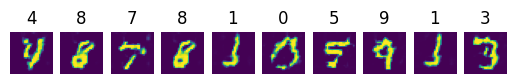

Epoch 30----Generator Loss:: 0.730473----Discriminator Loss:: 1.617928


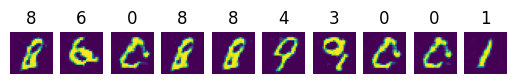

Epoch 31----Generator Loss:: 0.808591----Discriminator Loss:: 1.612461


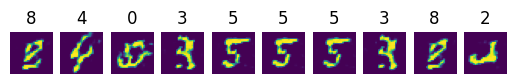

Epoch 32----Generator Loss:: 0.763906----Discriminator Loss:: 1.632859


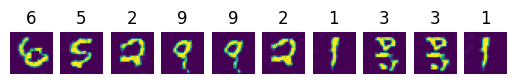

Epoch 33----Generator Loss:: 0.759290----Discriminator Loss:: 1.506126


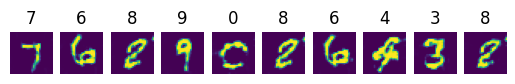

Epoch 34----Generator Loss:: 0.766378----Discriminator Loss:: 1.594443


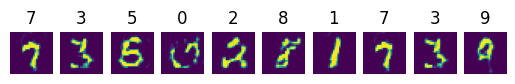

Epoch 35----Generator Loss:: 0.713894----Discriminator Loss:: 1.753143


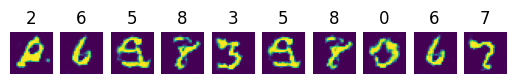

Epoch 36----Generator Loss:: 0.719288----Discriminator Loss:: 1.569944


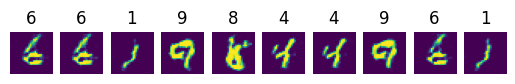

Epoch 37----Generator Loss:: 0.744881----Discriminator Loss:: 1.681021


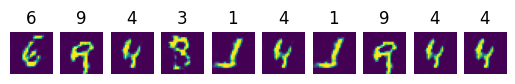

Epoch 38----Generator Loss:: 0.711343----Discriminator Loss:: 1.662013


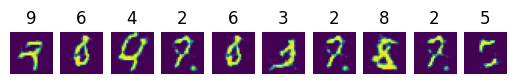

Epoch 39----Generator Loss:: 0.694454----Discriminator Loss:: 1.661037


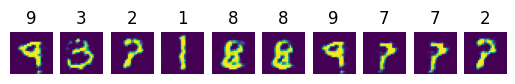

Epoch 40----Generator Loss:: 0.803145----Discriminator Loss:: 1.412645


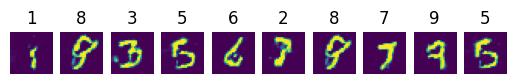

Epoch 41----Generator Loss:: 0.720253----Discriminator Loss:: 1.622013


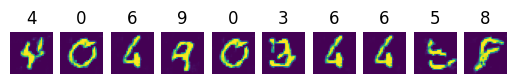

Epoch 42----Generator Loss:: 0.727665----Discriminator Loss:: 1.577374


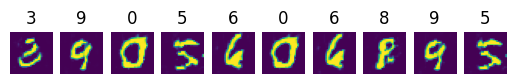

Epoch 43----Generator Loss:: 0.747402----Discriminator Loss:: 1.631890


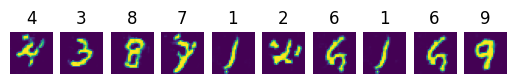

Epoch 44----Generator Loss:: 0.720644----Discriminator Loss:: 1.694360


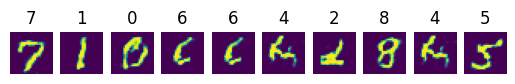

Epoch 45----Generator Loss:: 0.696539----Discriminator Loss:: 1.544431


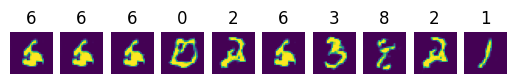

Epoch 46----Generator Loss:: 0.747060----Discriminator Loss:: 1.700656


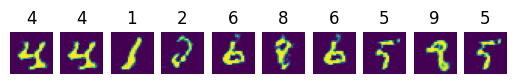

Epoch 47----Generator Loss:: 0.708488----Discriminator Loss:: 1.528212


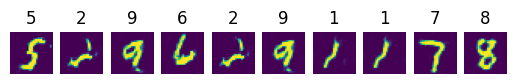

Epoch 48----Generator Loss:: 0.761696----Discriminator Loss:: 1.438873


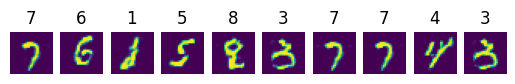

Epoch 49----Generator Loss:: 0.750607----Discriminator Loss:: 1.589523


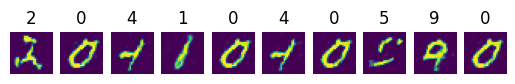

Epoch 50----Generator Loss:: 0.712961----Discriminator Loss:: 1.460028


In [5]:
DModel = Discriminator()
GModel = Generator()

bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optG = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.5)
optD = tf.keras.optimizers.Adam(learning_rate=1e-4)

def lossDfn(predR,predR_C,predF,predF_C,C):
    lossR = bce(tf.ones_like(predR),predR)
    lossF = bce(tf.zeros_like(predF),predF)
    lossC = cce(C,predR_C) + cce(C,predF_C)
    return lossR+lossF+lossC

def lossGfn(predF,predF_C,C):
    return bce(tf.ones_like(predF),predF)+cce(C,predF_C)

@tf.function
def trainStep(Images,Labels):
    Seeds = tf.random.normal([Labels.shape[0],noise_len])
    with tf.GradientTape() as tapeG, tf.GradientTape() as tapeD:
        FakeImgs = GModel((Seeds,Labels),training=True)
        predF,predF_C = DModel(FakeImgs,training=True)
        predR,predR_C = DModel(Images,training=True)
        lossG = lossGfn(predF,predF_C,Labels)
        lossD = lossDfn(predR,predR_C,predF,predF_C,Labels)
    gradG = tapeG.gradient(lossG,GModel.trainable_variables) 
    gradD = tapeD.gradient(lossD,DModel.trainable_variables)
    optG.apply_gradients(zip(gradG,GModel.trainable_variables))
    optD.apply_gradients(zip(gradD,DModel.trainable_variables))
    return lossG,lossD


def testStep(test_num = 10):
    testlabel = np.random.randint(10, size=test_num)
    testseed =tf.random.normal([test_num,noise_len])
    FakeImgs = GModel((testseed,tf.convert_to_tensor(testlabel)),training=False)
    showBatchImg(FakeImgs, testlabel, maxNum=test_num)


for epoch in range(50):
    counter = 0
    for _ , (Images,Labels) in enumerate(trainloader):
        lossG,lossD = trainStep(Images,Labels)
        counter += 1
        if counter%10 == 1:
            DModel.save_weights('tmp/D.weights.h5')
        if counter%10 == 6:
            DModel.load_weights('tmp/D.weights.h5')
    testStep(test_num = 10)
    print(f'Epoch {epoch+1}----Generator Loss:: {lossG:>7f}----Discriminator Loss:: {lossD:>7f}')

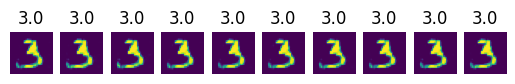

In [6]:
## 。。。模式崩溃
test_num = 10
testlabel = np.ones(test_num)*3
testseed =tf.random.normal([test_num,noise_len])
FakeImgs = GModel((testseed,tf.convert_to_tensor(testlabel)),training=False)
showBatchImg(FakeImgs, testlabel, maxNum=test_num)